# MA336: Artificial intelligence and machine learning with applications

### Name: Haris Fayyaz
### Course : MSC Applied Data Science
### Submitted to : Dr Zoe Bartlett
---

### Introduction
---

Employee attrition is among the most critical challenges that organizations are facing these days in this competitive market. As the loss of important and skilled staff can significantly impact productivity and companies' growth. To tackle this issue, we will be using artificial intelligence and machine learning models such as support vector machine (SVM), logistic regression and random forest model to predict employee attrition. By analyzing this "Attrition" dataset, employing various employee demographics. The goal here will be to uncover patterns and trends that result to employee turnover. The prediction gained from the dataset will not only enable accurate predictions of attrition but will also address employees' needs to create a working environment most suitable for the employees, retaining employees most suitable for their company. Key objectives of the project:
1) To develop a machine learning model that accurately predicts employee attrition based on the "Attrition" dataset.
2) To identify the critical factors and variables having the most significant influence on the employees turnover.
3) To provide insights and recommendations in order to enhance their employee retention strategies in order to create a positive working culture.

You can look into the kaggle dataset [here] (https://www.kaggle.com/code/janiobachmann/attrition-in-an-organization-why-workers-quit/input)

### Problem Statement

Predicting employee attrition is essential for organizations to reduce their turnover costs and implement effective retention strategies.


### Method

We will be using logistic regression, random forest, and support vector machine (SVM) models on our employee data to predict attrition risk.

### Importing Libraries 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')


### Importing Dataset 

In [38]:
# Load the CSV files
df1 = pd.read_csv("Attrition_1.csv")
df1

,Attrition,Age,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField
0,Yes,41,Travel_Rarely,1102,Sales,1,2,Life Sciences
1,No,49,Travel_Frequently,279,Research & Development,8,1,Life Sciences
2,Yes,37,Travel_Rarely,1373,Research & Development,2,2,Other
3,No,33,Travel_Frequently,1392,Research & Development,3,4,Life Sciences
4,No,27,Travel_Rarely,591,Research & Development,2,1,Medical
...,...,...,...,...,...,...,...,...
1465,No,36,Travel_Frequently,884,Research & Development,23,2,Medical
1466,No,39,Travel_Rarely,613,Research & Development,6,1,Medical
1467,No,27,Travel_Rarely,155,Research & Development,4,3,Life Sciences
1468,No,49,Travel_Frequently,1023,Sales,2,3,Medical


In [39]:
df2 = pd.read_csv("Attrition_2.csv")
df2

,Attrition,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction
0,Yes,1,1,2,Female,94,3,2,Sales Executive,4
1,No,1,2,3,Male,61,2,2,Research Scientist,2
2,Yes,1,4,4,Male,92,2,1,Laboratory Technician,3
3,No,1,5,4,Female,56,3,1,Research Scientist,3
4,No,1,7,1,Male,40,3,1,Laboratory Technician,2
...,...,...,...,...,...,...,...,...,...,...
1465,No,1,2061,3,Male,41,4,2,Laboratory Technician,4
1466,No,1,2062,4,Male,42,2,3,Healthcare Representative,1
1467,No,1,2064,2,Male,87,4,2,Manufacturing Director,2
1468,No,1,2065,4,Male,63,2,2,Sales Executive,2


In [40]:
df3 = pd.read_csv("Attrition_3.csv")
df3

,Attrition,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction
0,Yes,Single,5993,19479,8,Y,Yes,11,3,1
1,No,Married,5130,24907,1,Y,No,23,4,4
2,Yes,Single,2090,2396,6,Y,Yes,15,3,2
3,No,Married,2909,23159,1,Y,Yes,11,3,3
4,No,Married,3468,16632,9,Y,No,12,3,4
...,...,...,...,...,...,...,...,...,...,...
1465,No,Married,2571,12290,4,Y,No,17,3,3
1466,No,Married,9991,21457,4,Y,No,15,3,1
1467,No,Married,6142,5174,1,Y,Yes,20,4,2
1468,No,Married,5390,13243,2,Y,No,14,3,4


In [41]:
df4 = pd.read_csv("Attrition_4.csv")
df4

,Attrition,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,Yes,80,0,8,0,1,6,4,0,5
1,No,80,1,10,3,3,10,7,1,7
2,Yes,80,0,7,3,3,0,0,0,0
3,No,80,0,8,3,3,8,7,3,0
4,No,80,1,6,3,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...
1465,No,80,1,17,3,3,5,2,0,3
1466,No,80,1,9,5,3,7,7,1,7
1467,No,80,1,6,0,3,6,2,0,3
1468,No,80,0,17,3,2,9,6,0,8


#### Combining all the dataframes into a single dataframe by joing all on the basis of "Attrition"  :

In [45]:
df=pd.concat([df1,df2,df3,df4])
df

,Attrition,Age,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,Yes,41.0,Travel_Rarely,1102.0,Sales,1.0,2.0,Life Sciences,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,No,49.0,Travel_Frequently,279.0,Research & Development,8.0,1.0,Life Sciences,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Yes,37.0,Travel_Rarely,1373.0,Research & Development,2.0,2.0,Other,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,No,33.0,Travel_Frequently,1392.0,Research & Development,3.0,4.0,Life Sciences,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,No,27.0,Travel_Rarely,591.0,Research & Development,2.0,1.0,Medical,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,80.0,1.0,17.0,3.0,3.0,5.0,2.0,0.0,3.0
1466,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,80.0,1.0,9.0,5.0,3.0,7.0,7.0,1.0,7.0
1467,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,80.0,1.0,6.0,0.0,3.0,6.0,2.0,0.0,3.0
1468,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,80.0,0.0,17.0,3.0,2.0,9.0,6.0,0.0,8.0


In [46]:
df.columns

Index(['Attrition', 'Age', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction',
       'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'Over18', 'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')

In [3]:
df.head(5)

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


### Exploratory Data Analysis 
---

Exploratory Data Analysis (EDA) is an important step in understanding the structure, patterns, and relationships within a dataset. It involves summarizing our main characteristics of the data, through different visual methods inorder to gain insights.
Our primary objectives of EDA are:
1) To understand the data distribution and its key statistical properties.
2) To explore relationships and correlations between variables.
3) To detect potential outliers or errors in the data.
4) To identify patterns, trends, and anomalies within the dataset.


#### To view all the columns :


In [4]:
pd.set_option("display.max_columns",None)
df.head(5)

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,2,Female,94,3,2,Sales Executive,4,Single,5993,19479,8,Y,Yes,11,3,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,3,Male,61,2,2,Research Scientist,2,Married,5130,24907,1,Y,No,23,4,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,4,Male,92,2,1,Laboratory Technician,3,Single,2090,2396,6,Y,Yes,15,3,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,4,Female,56,3,1,Research Scientist,3,Married,2909,23159,1,Y,Yes,11,3,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,1,Male,40,3,1,Laboratory Technician,2,Married,3468,16632,9,Y,No,12,3,4,80,1,6,3,3,2,2,2,2


#### Finding names of all the columns in our dataset :


In [5]:
df.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction',
       'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'Over18', 'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')

Our dataset consists of several columns, such as "Age", "Attrition", "Monthly income", "Over Time", etc. Giving us an insight into what our current initial dataset columns are and brainstorm about the initial idea of the results that we are to expect from our dataset. 

#### Getting the shape of our dataset ( The number of rows and columns) :

In [6]:
df.shape

(1470, 35)

The dataset contains 1470 rows and 35 columns. This means there are 1470 observations or instances, each characterized by 35 different attributes or features.

#### Getting information about our dataset( The total no of rows and columns) :

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

The dataset consists of 1470 entries with 35 columns. Each column represents a specific attribute or feature of the dataset. The columns include information such as age, daily rate, distance from home, education level, job role, marital status, monthly income, overtime status, and various other factors related to employee demographics and job satisfaction. The data types of the columns vary, with some columns containing numerical values (integer type) and others containing categorical values (object type). There are no missing values in the dataset, as indicated by the non-null counts for all columns.

#### Getting type of each data :


In [8]:
df.dtypes

Age                          int64
Attrition                   object
BusinessTravel              object
DailyRate                    int64
Department                  object
DistanceFromHome             int64
Education                    int64
EducationField              object
EmployeeCount                int64
EmployeeNumber               int64
EnvironmentSatisfaction      int64
Gender                      object
HourlyRate                   int64
JobInvolvement               int64
JobLevel                     int64
JobRole                     object
JobSatisfaction              int64
MaritalStatus               object
MonthlyIncome                int64
MonthlyRate                  int64
NumCompaniesWorked           int64
Over18                      object
OverTime                    object
PercentSalaryHike            int64
PerformanceRating            int64
RelationshipSatisfaction     int64
StandardHours                int64
StockOptionLevel             int64
TotalWorkingYears   

The dataset contains various data types, including integers and objects. Integers are used to represent numerical values, such as age, daily rate, distance from home, and various other numerical attributes. Objects represent categorical variables, such as attrition status, business travel type, department, education field, gender, job role, marital status, overtime status, and over 18 status. These data types provide insights into the nature of the attributes and help in understanding the structure of the dataset.

#### Getting some statistics from our dataset :

In [9]:
df.describe()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,MonthlyRate,NumCompaniesWorked,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,802.485714,9.192517,2.912925,1.0,1024.865306,2.721769,65.891156,2.729932,2.063946,2.728571,6502.931293,14313.103401,2.693197,15.209524,3.153741,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,403.509100,8.106864,1.024165,0.0,602.024335,1.093082,20.329428,0.711561,1.106940,1.102846,4707.956783,7117.786044,2.498009,3.659938,0.360824,1.081209,0.0,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,102.000000,1.000000,1.000000,1.0,1.000000,1.000000,30.000000,1.000000,1.000000,1.000000,1009.000000,2094.000000,0.000000,11.000000,3.000000,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,465.000000,2.000000,2.000000,1.0,491.250000,2.000000,48.000000,2.000000,1.000000,2.000000,2911.000000,8047.000000,1.000000,12.000000,3.000000,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,802.000000,7.000000,3.000000,1.0,1020.500000,3.000000,66.000000,3.000000,2.000000,3.000000,4919.000000,14235.500000,2.000000,14.000000,3.000000,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,1157.000000,14.000000,4.000000,1.0,1555.750000,4.000000,83.750000,3.000000,3.000000,4.000000,8379.000000,20461.500000,4.000000,18.000000,3.000000,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1499.000000,29.000000,5.000000,1.0,2068.000000,4.000000,100.000000,4.000000,5.000000,4.000000,19999.000000,26999.000000,9.000000,25.000000,4.000000,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


#### Checking For Missing Values in our dataset :


In [10]:
#Getting count of th empty values of each column

df.isnull()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1466,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1467,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1468,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [11]:
#Checking if any has a null value
df.isnull().values.any()

False

Since it returns "False", it indicates that that we do not have any misiing values in the dataset.

In [12]:
#Finding Null Values in the dataset
df.isnull().sum()

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

The output indicates that there are no null values present in any of the columns of the dataset. This is a good sign, as it ensures that the dataset is complete and ready for further analysis and modeling without the need for imputation or handling missing data.

#### Checking for Duplicates in our dataset :


In [13]:
# Checking For Duplicates and counting the unique values
print(df.duplicated().value_counts())
# Removing duplicates in the DataFrame
df.drop_duplicates(inplace=True)
# Printing the length of the DataFrame after removing duplicates
print(len(df))

False    1470
Name: count, dtype: int64
1470


The output shows that there are no duplicate rows in the dataset, as we can observe by the count of the unique values of the duplicated rows (1470). Additionally, the length of the DataFrame alsp remains unchanged after removing duplicates, further confirming that there are no duplicates present. 

#### Count of employees that stayed in the company :


In [14]:
df["Attrition"].value_counts()

Attrition
No     1233
Yes     237
Name: count, dtype: int64

The output indicates that there are 1233 employees who stayed in the company (Attrition = No) and 237 employees who left the company (Attrition = Yes). This information provides insight into the attrition rate within the company, which is essential for understanding employee turnover and retention strategies.

# Feature Enginering

#### Removing unnecessary columns from the dataset as they not brining any new information :


In [15]:
df=df.drop("EmployeeNumber",axis=1)
df=df.drop("StandardHours",axis=1)  
df=df.drop("EmployeeCount",axis=1)  

Here in our dataset we remove 3 of our columns, comprising of the "EmployeeNumber", "StandardHours" and the "EmployeeCount", as they are unnecessary for our analysis and do not comprehend any meaningful information for our data exploration. 

"EmployeeNumber" likely serves as a unique identifier for each employee, which isn't pertinent to our analysis of factors influencing attr​ition. Similarly, "StandardHours" appears to have a constant value across all entries, suggesting it doesn't offer variability or insights into employee behavior. "EmployeeCount" also seems uniform, indicating that all entries represent a single employee, making it redundant.

# Visualizations

#### Visualizing the number of employees that stayed or left the company :

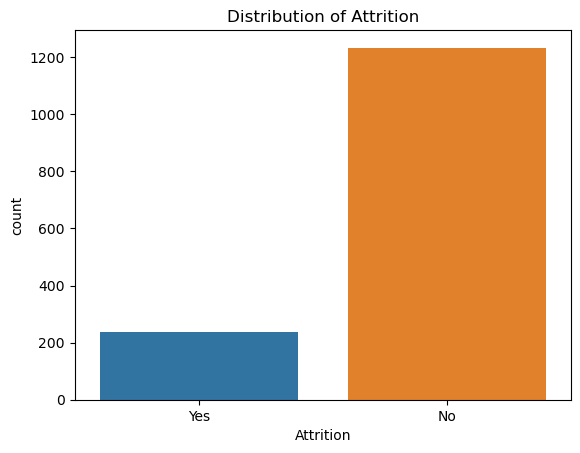

In [16]:
sns.countplot(x='Attrition', data=df)
plt.title('Distribution of Attrition')
plt.show()

The visualization depicts the distribution of employee attrition within the data set. The horizontal axis categorizes employees who left (Yes) and those who stayed (No). The vertical axis represents the number of employees in each category. By comparing the bar heights, we can identify if more employees left the company or stayed. A taller bar for "Yes" signifies higher turnover, while a taller "No" bar indicates better employee retention. If the bars are similar in height, it suggests a relatively balanced distribution between leavers and stayers. Thus, in this initial graph we can see more "No" indicating that more employees stayed in the company rather than leaving.

#### Visualizing 'Attribution' with respect to 'Department' :

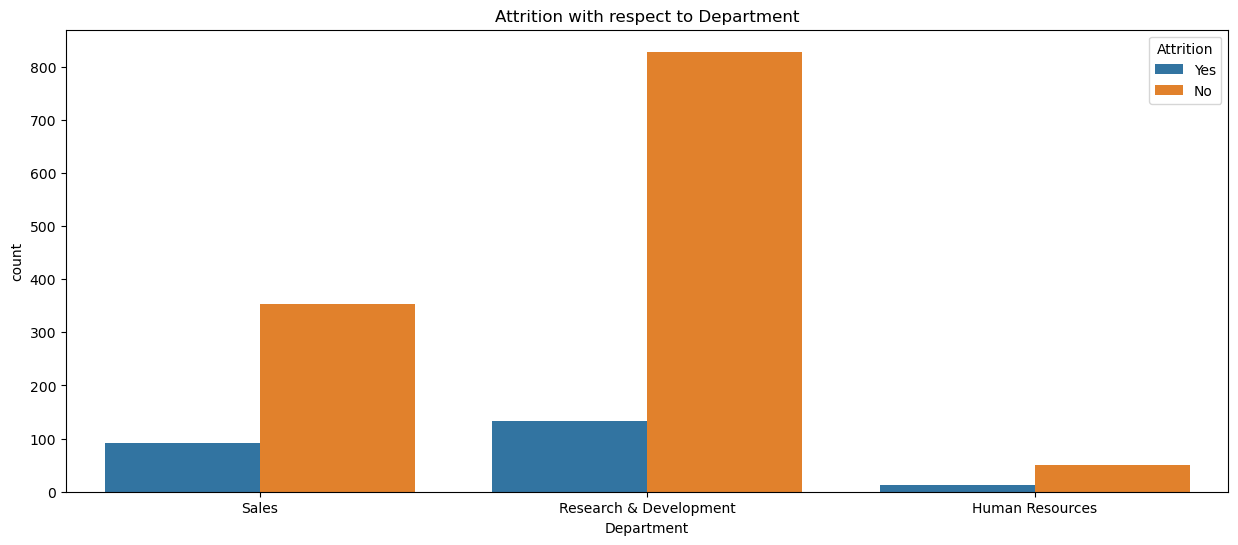

In [17]:
plt.figure(figsize=(15,6 ))
sns.countplot(x="Department", hue="Attrition", data=df)
plt.title("Attrition with respect to Department")
plt.show()

This graph visualizes the distribution of attrition in comparison to the departments. Such that the x-axis showcases the departments and y as their count. Within the graph, the blue graph shows "Yes" for the attrition, such that it is the number of employees that left, while the orange as "No", indicating that it is the number of employees that stayed.

Moreover, from the graph above we gained several insights:
1) For each department, more employees stay rather than leave.
2) The department of Research & Development has the highest number of employees that both stayed and that left. Indicating the major staff of the organization within the research department.
3) The HR department has the fewest number of employees. Thus, there were fewer employees that either stayed or left the organization.

#### Visualizing 'Attribution' with respect to 'EducationField' :


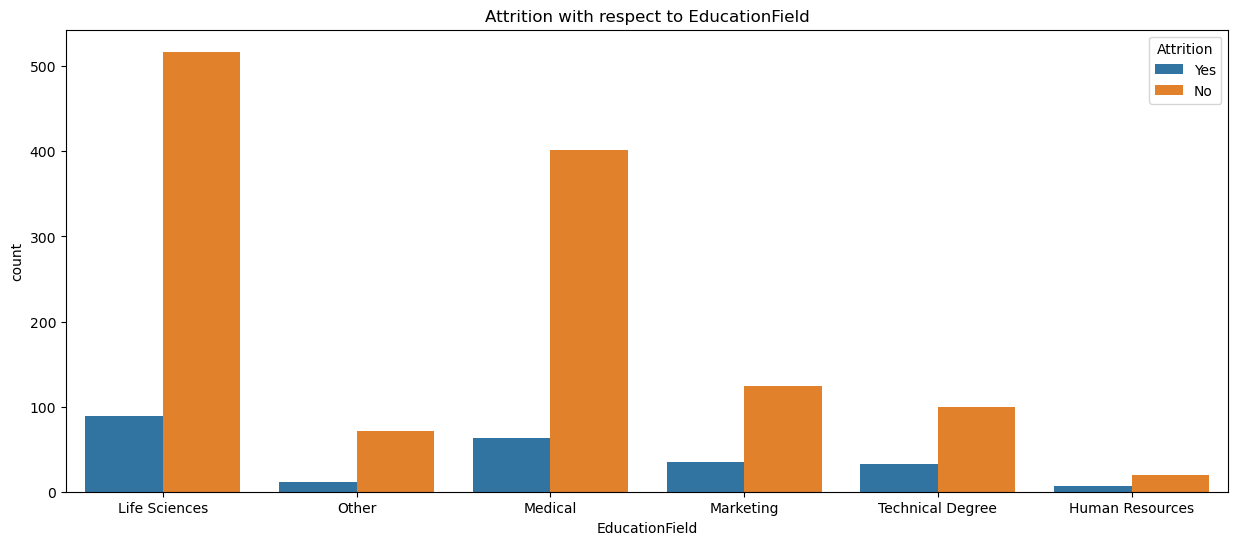

In [18]:
plt.figure(figsize=(15, 6))
sns.countplot(x="EducationField", hue="Attrition", data=df)
plt.title("Attrition with respect to EducationField")
plt.show()

From this graph we can analyze the distribution of the "Attrition" with respect to the "Educational Fields" of the employees with the organization. Within our graph we have all the educational fields on th x-axis and their count on the y-axis.

The blue bar represents the yes for the attrition, such that is the number of employees that stayed within the organization. Moreover, through the orange graph representing No for the attrition representing the employees that stayed within the organization.

Moreover, from the graph above we gained several insights:
1) The employees that had the background educational field of lifesciences were the highest, such that around 517 employees from this background stayed within the organization. This background was also the highest among the employees that left, giving a total of 89 employees that left the organization.
2) The number of employees from the HR background was the least which can be observed from both the graph and the table below. Indicating that only 20 employees stayed, while only 7 of the employees left the organization. Indicating only a total of 27 employees with a HR background. Resulting it among the background with the fewest employees. 
3) However, there are other backgrounds as well, such as "Marketing","Medical","Technical" and some others that come in between as well.

In [19]:
df.groupby('EducationField')['Attrition'].value_counts()

EducationField    Attrition
Human Resources   No            20
                  Yes            7
Life Sciences     No           517
                  Yes           89
Marketing         No           124
                  Yes           35
Medical           No           401
                  Yes           63
Other             No            71
                  Yes           11
Technical Degree  No           100
                  Yes           32
Name: count, dtype: int64

#### Visualizing 'Attribution' with respect to 'JobRole' :


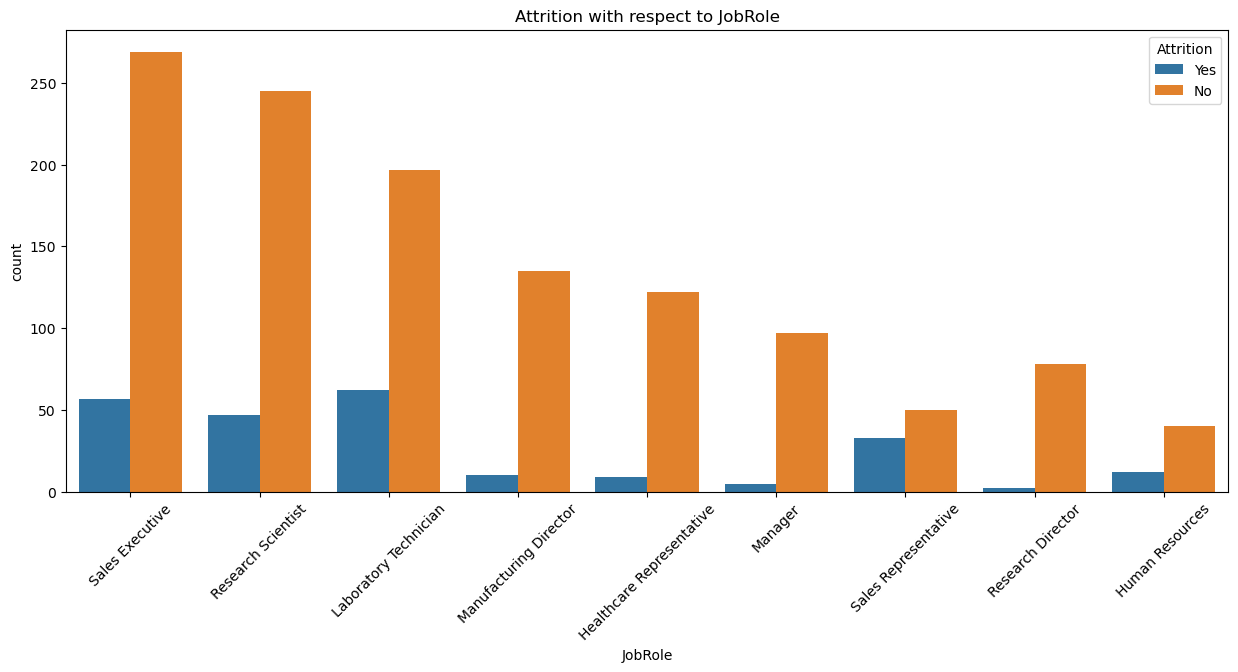

In [20]:
plt.figure(figsize=(15, 6))
sns.countplot(x="JobRole", hue="Attrition", data=df)
plt.title("Attrition with respect to JobRole")
plt.xticks(rotation=45)
plt.show()

From this graph we can analyze the distribution of the "Attrition" with respect to the "Educational Fields" of the employees with the organization. Within our graph we have all the educational fields on th x-axis and their count on the y-axis.

The blue bar represents the yes for the attrition, such that is the number of employees that stayed within the organization. Moreover, through the orange graph representing No for the attrition representing the employees that stayed within the organization.

Moreover, from the graph above we gained several insights:
1) The "Sales executives" were the highest in the number coming, of a total of 269 that stayed while 57 of them left the organization.
2) Moreover, we can observe that the least number of employees from the "Research Director",  amounting to 2, left the organization. Just before the "Managers" position, that amounted to 5. Suggesting that th company  has low attrition in the management.
3) The "Research Scientist" has the second-highest non-attrition figure, amounting to 245, suggesting that, after that "Sales Executive", it has the most employees that stayed in the organization.

In [21]:
df.groupby('JobRole')['Attrition'].value_counts()

JobRole                    Attrition
Healthcare Representative  No           122
                           Yes            9
Human Resources            No            40
                           Yes           12
Laboratory Technician      No           197
                           Yes           62
Manager                    No            97
                           Yes            5
Manufacturing Director     No           135
                           Yes           10
Research Director          No            78
                           Yes            2
Research Scientist         No           245
                           Yes           47
Sales Executive            No           269
                           Yes           57
Sales Representative       No            50
                           Yes           33
Name: count, dtype: int64

#### Visualizing 'Attribution' with respect to 'Gender' :


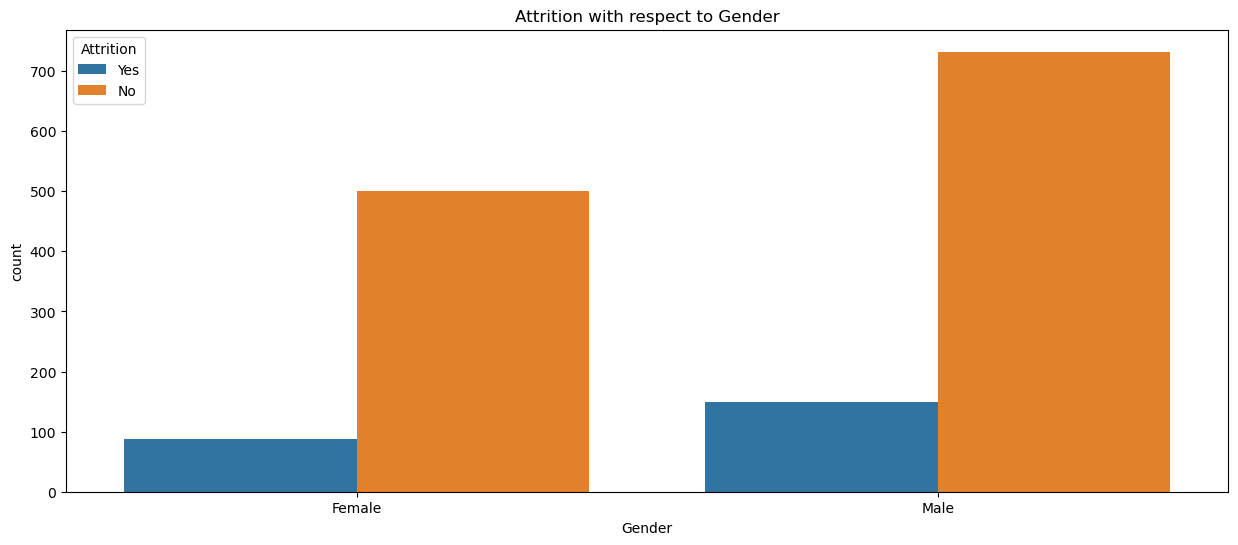

In [23]:
plt.figure(figsize=(15, 6))
sns.countplot(x="Gender", hue="Attrition", data=df)
plt.title("Attrition with respect to Gender")
plt.show()

In [24]:
result = df.groupby(["Gender", "Attrition"]).agg({"Age": "count"})
print(result)

                  Age
Gender Attrition     
Female No         501
       Yes         87
Male   No         732
       Yes        150


In [25]:
#Attrition percentage for females
87/(501+87)

0.14795918367346939

In [26]:
#Attrition percentage for males
150/(150+732)

0.17006802721088435

From the graph above we can see the males being more populated in comparison to the females.

However, if we go into the attrition percentages, we observe:
1) There is a 14.7% attribution for females
2) There is a 17.0% attribution for males

Thus concluding that the males have a higher attrition in comparison to the females.



#### Visualizing the No of Employees that left or stayed by 'Age' :


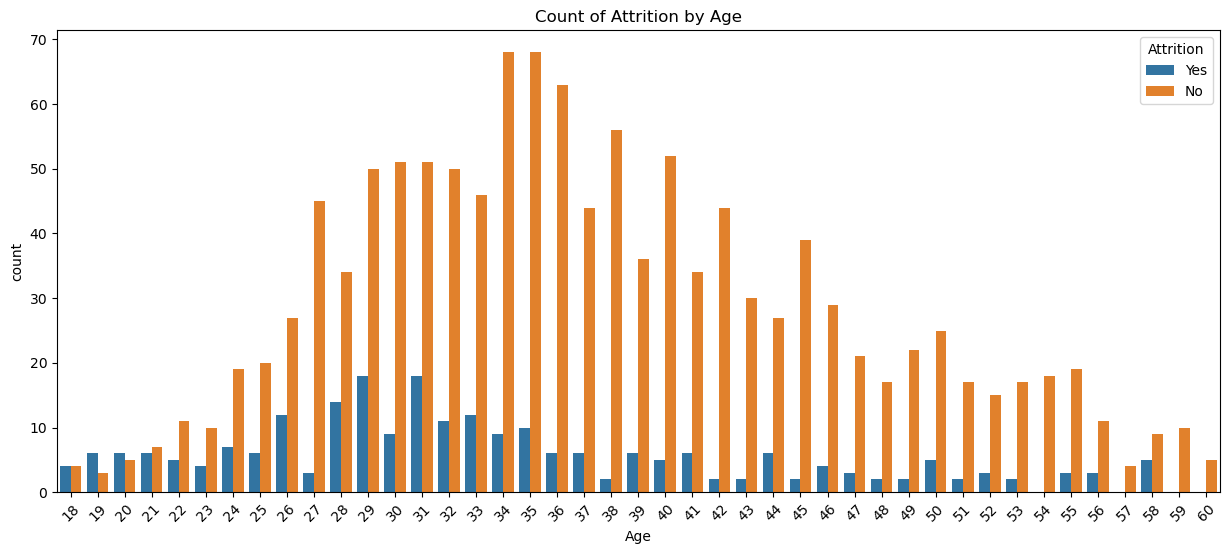

In [27]:
plt.figure(figsize=(15, 6))

sns.countplot(x="Age", hue="Attrition", data=df)
plt.title('Count of Attrition by Age')
plt.xticks(rotation=45)
plt.show()

From the graph above we gained several insights:

1) The employees aged 34 and 35 are the highest that are not attriting from the organization.
2) The highest attrition of employees is aged between 29 and 31.
3) More young adults in their late 20s and early 30s are employed in comparison to complete teenagers or old aged employees.

#### Visualizing the Distribution of 'Age' :

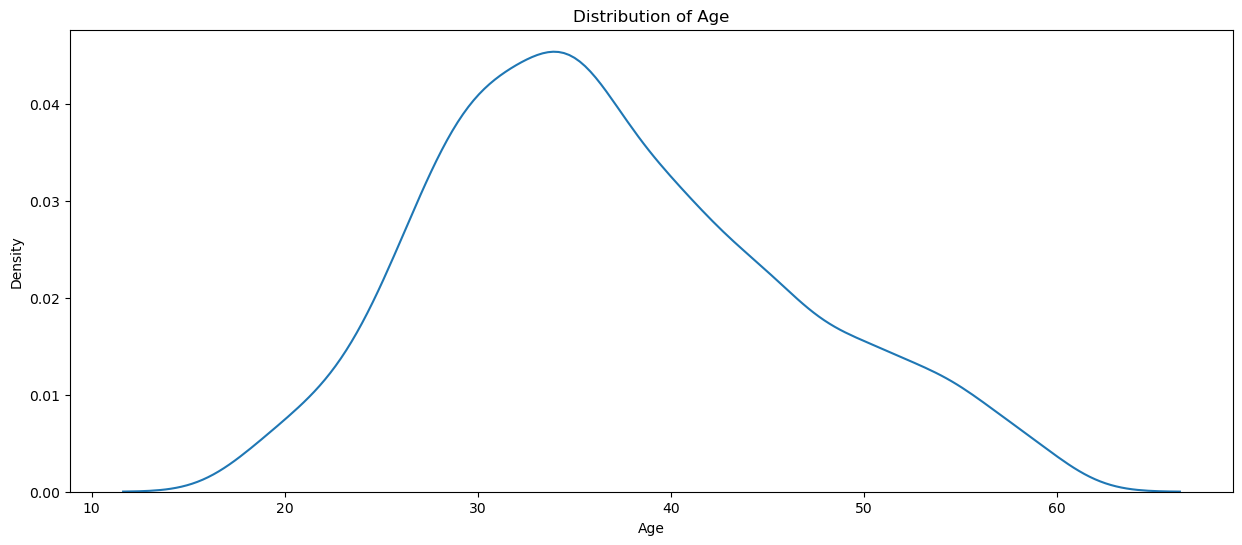

In [28]:
plt.figure(figsize=(15, 6))
sns.distplot(df["Age"], hist=False)
plt.title("Distribution of Age")
plt.xlabel("Age")
plt.ylabel("Density")
plt.show()

From the graph above we gained several insights:

1) The distribution of age is skewed to the right, meaning that there are more younger individuals within their employee population in comparison to the older aged employees.
2) The highest density is around the age of 25-30, indicating that there is a relatively larger concentration of individuals in this age group within the employee age population.


#### Visualizing 'Education' with respect to 'Attrition' :


In [29]:
oridnal_features=["Education","EnvironmentSatisfaction","JobInvolvement","JobSatisfaction","PerformanceRating","RelationshipSatisfaction","WorkLifeBalance"]
df[oridnal_features].head(5)

,Education,EnvironmentSatisfaction,JobInvolvement,JobSatisfaction,PerformanceRating,RelationshipSatisfaction,WorkLifeBalance
0,2,2,3,4,3,1,1
1,1,3,2,2,4,4,3
2,2,4,2,3,3,2,3
3,4,4,3,3,3,3,3
4,1,1,3,2,3,4,3


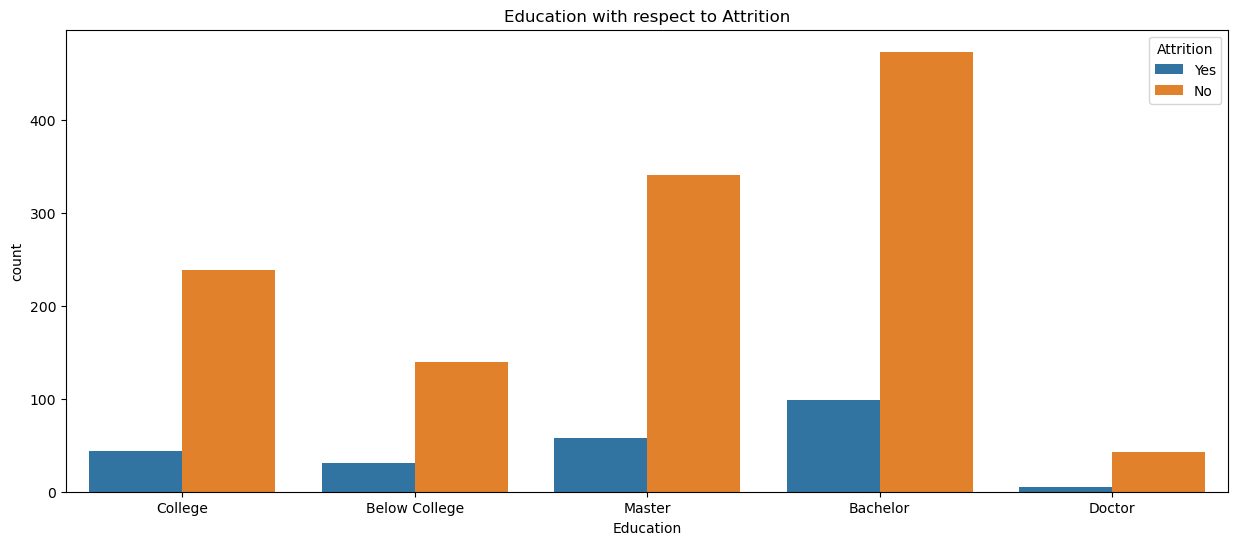

In [30]:
listing={1:"Below College",2:"College",3:"Bachelor",4:"Master",5:"Doctor"}
plt.figure(figsize=(15,6))
sns.countplot(x=df["Education"].map(listing),hue="Attrition",data=df)
plt.title("Education with respect to Attrition")
plt.show()

From the graph above we gained several insights:

1) The highest number of employees in the organization have a bachelors degree. And thus, they are the ones that have the employees that have the most attrition and the non-attrition rate is in comparison to any other degree.
2)  The organization has the least number of employees having a "Doctor" degree, indicating it to have the least proportion of both the attrition and the non-attrition in comparison to any other degree holder.

#### Visualizing the "Maritial Status of each Employee" :

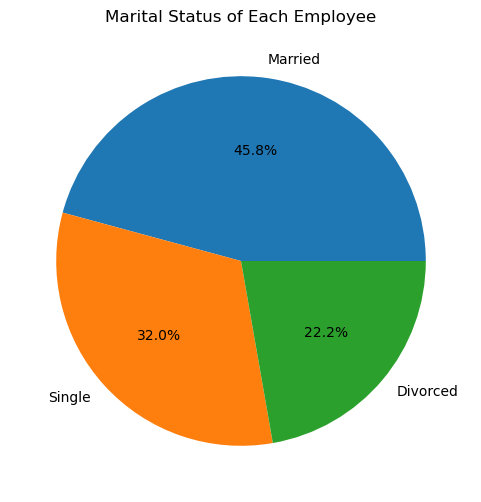

In [31]:
labels = df["MaritalStatus"].value_counts().index
plt.figure(figsize=(15, 6))
plt.pie(x=df["MaritalStatus"].value_counts(), labels=labels, autopct='%1.1f%%')
plt.title("Marital Status of Each Employee")
plt.show()

From the graph above we conclude:

1) The highest number of employees within the organization are married.
2) After that, the highest number of employees are single.
3) And lastly, the highest number of employees are divorced.
4) Concluding that within the organization, the highest number of employees are married followed by singles and then divorced. 


#### Visualizing the "Overtime Status of each Employee" :

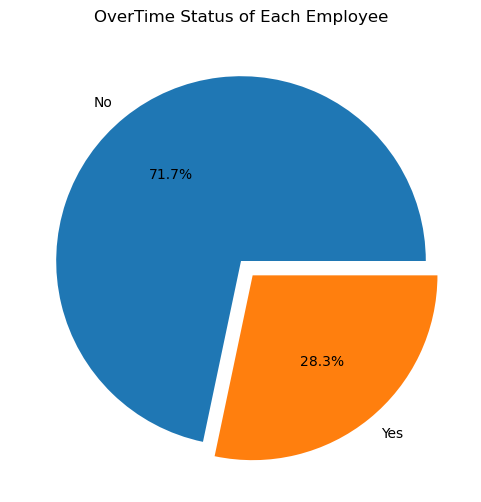

In [32]:
labels = df["OverTime"].value_counts().index
plt.figure(figsize=(15, 6))
plt.pie(x=df["OverTime"].value_counts(), labels=labels, autopct='%1.1f%%', explode=[0, 0.1])
plt.title("OverTime Status of Each Employee")
plt.show()



From the graph above, we conclude that 71.7% of the employees that did overtime stay in the organization while 28.3% of the employees that did overtime leave the organization.



#### Visualizing the "Total Number of Hours Spent Working in a Company by the Employees"

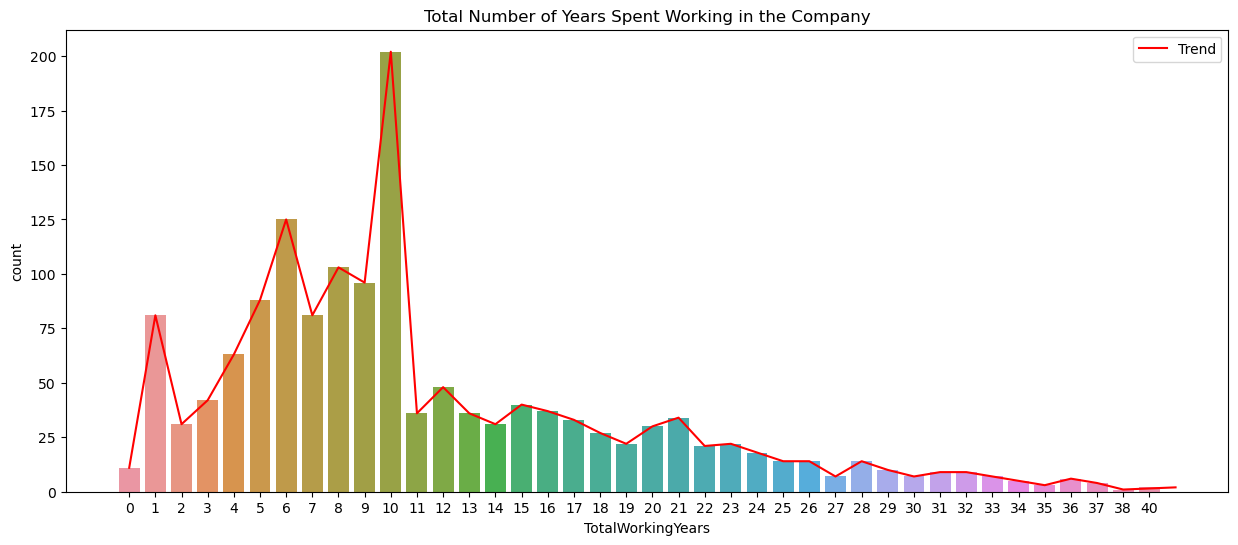

In [33]:
# Getting the counts of each value in the "TotalWorkingYears" column
value_counts = df["TotalWorkingYears"].value_counts()

# Getting the unique values (years) as labels in our graph
labels = value_counts.index.tolist()

# Creating a count plot
plt.figure(figsize=(15, 6))
sns.countplot(x="TotalWorkingYears", data=df)

# Adding a trend line on our plot
sns.lineplot(x=labels, y=value_counts, color='red', label='Trend')

# Setting a title for our plot
plt.title("Total Number of Years Spent Working in the Company")

# Showing the plot
plt.show()

#### From the graph above we conclude:

1) Within this graph we have the total working years on our x-axis and the count of those years on our y-axis.
2) The majority of employees worked in the organization for 10 years.

In [34]:
df["TotalWorkingYears"].mean()

11.279591836734694

From the above, mean working years are calculated as 11.28 years. Suggesting that on average, employees in our dataset spend around 11.28 years working in the company.

#### Printing all data types and their unique types :

In [35]:
for column in df.columns:
    if df[column].dtype==object:
        print(str(column)+':'+str(df[column].unique()))
        print(df[column].value_counts())
        print('------------------------------------------------------------------------')

Attrition:['Yes' 'No']
Attrition
No     1233
Yes     237
Name: count, dtype: int64
------------------------------------------------------------------------
BusinessTravel:['Travel_Rarely' 'Travel_Frequently' 'Non-Travel']
BusinessTravel
Travel_Rarely        1043
Travel_Frequently     277
Non-Travel            150
Name: count, dtype: int64
------------------------------------------------------------------------
Department:['Sales' 'Research & Development' 'Human Resources']
Department
Research & Development    961
Sales                     446
Human Resources            63
Name: count, dtype: int64
------------------------------------------------------------------------
EducationField:['Life Sciences' 'Other' 'Medical' 'Marketing' 'Technical Degree'
 'Human Resources']
EducationField
Life Sciences       606
Medical             464
Marketing           159
Technical Degree    132
Other                82
Human Resources      27
Name: count, dtype: int64
------------------------------------

From the above table we conclude that:
1) For the "Attrition," it states that 237 employees left the company while 1233 employees were still in the company.
2)  For the "Business Travel", it states that 1043 employees  rarely traveled, 277 employees traveled frequently, and 150 employees did not travel.
3)  Furthermore, we observed employees distributed into several departments with the majority of them working in "Research & Development"(961), followed by "Sales"(446), and the smallest among them being in the "Human Resource" (63).
4)  Furthermore, we have the "Education Field" of employees, such that the majority have a background in Life Science (606), followed by Medical (464), then Marketing(159), then Technical Degree (132), the others( 82) and lastly the Human Resource(27).
5) For "Gender", observe that there are more male employees(882) as compared to female employees(558).
6) Also, for the "JobRole", we can observe that the most common job roles are Sales Executive (326), followed by Research Scientist(292), then Laboratory Technician(259), then Manufacturing Director (145), then the Healthcare Representative(131), then  Manager (102), then the Sales Representative (83) , then the Research Director(80) and lastly the Human Resources (52).
7) From the "Maritial Statues" provided we conclude that the majority of the employees are married (673), followed by the employees that are single (470) and lastly the employees that are divorced (327).
8) From the dataset we conclude that all the employees in our dataset are over the age of 18.
9) And lastly, we conclude that the majority of employees in our dataset do not work overtime (1054), while only a smaller proportion of the employees worked overtime (​416).

#### Visualize correlation matrix using heatmap :

In [36]:
numeric_df = df.select_dtypes(include='number')

# Computing the correlation matrix
correlation_matrix = numeric_df.corr()

print(correlation_matrix)

                               Age  DailyRate  DistanceFromHome  Education  \
Age                       1.000000   0.010661         -0.001686   0.208034   
DailyRate                 0.010661   1.000000         -0.004985  -0.016806   
DistanceFromHome         -0.001686  -0.004985          1.000000   0.021042   
Education                 0.208034  -0.016806          0.021042   1.000000   
EnvironmentSatisfaction   0.010146   0.018355         -0.016075  -0.027128   
HourlyRate                0.024287   0.023381          0.031131   0.016775   
JobInvolvement            0.029820   0.046135          0.008783   0.042438   
JobLevel                  0.509604   0.002966          0.005303   0.101589   
JobSatisfaction          -0.004892   0.030571         -0.003669  -0.011296   
MonthlyIncome             0.497855   0.007707         -0.017014   0.094961   
MonthlyRate               0.028051  -0.032182          0.027473  -0.026084   
NumCompaniesWorked        0.299635   0.038153         -0.029251 

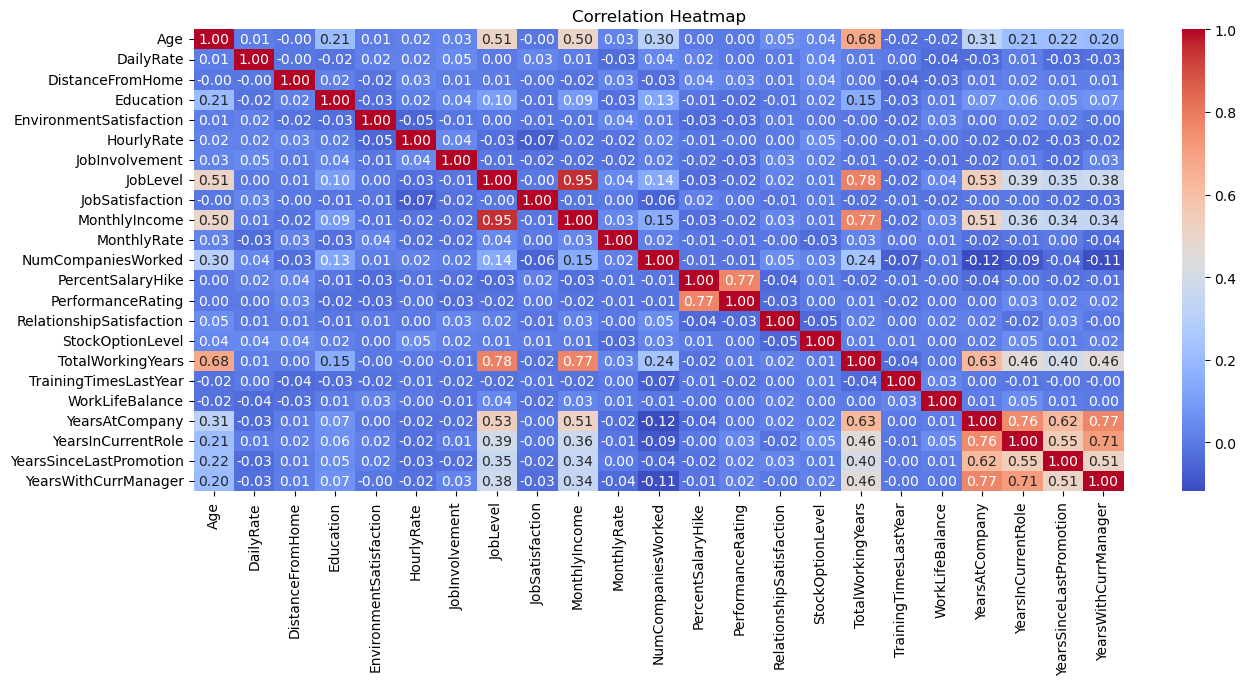

In [37]:
plt.figure(figsize=(15,6)) #Adjusting the figure size
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap') #Assigning a tittle to our plot
plt.show()

A correlation coefficient of 1 indicates a perfect positive correlation among the variables, suggesting that when one of the variables increases, the other increases as well. However, a correlation of -1 indicates a perfect negative correlation between the two variables. Such that if one of the variables increases, the other value decreases. A correlation coefficient of 0 indicates that there is no correlation between the two variables. Moreover, further, a value greater than 0.7 indicates a strong positive/negative correlation. A value between 0.30-0.7 indicates a moderate positive/ negative correlation. And a value less than 0.3 indicates weak correlations

Some of the observations observed from our dataset are:

1) We can observe a moderate positive correlation of "Age" with "TotalWorkingYears" of 68%. Indicating that the longer you are working in a job the older you are getting.
2) The "JobLevel" has a 78% correlation with a strong positive correlation. And the total working years indicates that the longer you work, the higher your job level is because you might know more about the job and have more information about it.
3)  "MonthlyIncome" has a 77%, indicating a strong positive correlation with the "TotalWorkingYears" indicating that the longer you work, the more your monthly income is.
4) There is a 95% strong positive correlation between "JobLevel" and "MonthlyIncome". Indicating that the higher your job levels are, the more your monthly income is.
5) We can observe a moderate correlation of the "JobLevel" with all the variables named "Age","YearsAtCompany","YearsInCurrentRole","YearsSinceLastPromotion","YearsWithCurrManager". Indicating that the job level of the employee has some association with these five variables. 
6) Similar is the "MonthlyIncome", which also has a moderate corelation with all the variables named "Age","YearsAtCompany","YearsInCurrentRole","YearsSinceLastPromotion","YearsWithCurrManager". Indicating that the monthly income of the employee has some association with these five variables. 

# Label Encoding

 Label encoding is a preprocessing technique used to convert categorical variables into a numerical format, which is required by many machine learning algorithms. In label encoding, each unique category in a categorical variable is assigned a unique integer. Thus, the  transformation helps in representing categorical data in such a way that it can be understood and can be used by machine learning algorithms.

#### Encoding Target variable :


In [134]:
df['Attrition'] = df['Attrition'].replace({'No': 0, 'Yes': 1})

 Here we apply label encoding to the target variable 'Attrition'. By replacing 'No' with 0 and 'Yes' with 1, effectively transforming the variable into a binary format for classification purposes. Moreover, this encoding simplifies the target variable, enabling machine learning algorithms to predict whether employees are likely to stay or leave the company based on other features in the dataset.

#### Encoding remaining variables (Binary ones) :

In [135]:
df['OverTime']=df['OverTime'].replace({'No': 0, 'Yes': 1})
df['Gender']=df['Gender'].replace({'Male': 0, 'Female': 1})
df['Over18']=df['Over18'].replace({'Y': 1, 'N': 0})

Now here we performs label encoding on the binary variables 'OverTime', 'Gender', and 'Over18'. By replacing 'No' with 0 and 'Yes' with 1 for 'OverTime', 'Male' with 0 and 'Female' with 1 for 'Gender', and 'Y' with 1 and 'N' with 0 for 'Over18'. This encoding simplifies the representation of binary categorical variables, making them suitable for machine learning algorithms to process effectively.

#### Encoding remaining variables (Non-Binary ones)-(More can 2 outcomes) :


In [136]:
from sklearn.preprocessing import LabelEncoder
encoding_cols=['BusinessTravel','Department','EducationField','JobRole','MaritalStatus']
label_encoders={}
for column in encoding_cols:
    label_encoders[column]=LabelEncoder()
    df[column]=label_encoders[column].fit_transform(df[column])

Here we apply label encoding to non-binary categorical variables such that to variables having more than two outcomes. The variables 'BusinessTravel', 'Department', 'EducationField', 'JobRole', and 'MaritalStatus' are encoded using sklearn's LabelEncoder. Each unique category in these columns is assigned a numerical label, which allows for better handling of categorical data in machine learning models. The LabelEncoder instances are stored in a dictionary named label_encoders for potential future use.

#### Checking if all variables are integers now?


In [137]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 32 columns):
 #   Column                    Non-Null Count  Dtype
---  ------                    --------------  -----
 0   Age                       1470 non-null   int64
 1   Attrition                 1470 non-null   int64
 2   BusinessTravel            1470 non-null   int32
 3   DailyRate                 1470 non-null   int64
 4   Department                1470 non-null   int32
 5   DistanceFromHome          1470 non-null   int64
 6   Education                 1470 non-null   int64
 7   EducationField            1470 non-null   int32
 8   EnvironmentSatisfaction   1470 non-null   int64
 9   Gender                    1470 non-null   int64
 10  HourlyRate                1470 non-null   int64
 11  JobInvolvement            1470 non-null   int64
 12  JobLevel                  1470 non-null   int64
 13  JobRole                   1470 non-null   int32
 14  JobSatisfaction           1470 non-null 

Now from the above table we can observe that all the variables in our dataset are integers now. And none are left as a categorical variable. Moreover, as now, all columns in the DataFrame have integer data types. It is now suitable for many machine learning algorithms. Ensuring that our database is now ready for further analysis and modeling.

In [138]:
#Create a new column

df["Age_Years"]=df["Age"]

Here we are creating a new column, "Age Years", duplicating the values in our existing variable "Age".

In [139]:
df=df.drop("Age",axis=1)
df

,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Age_Years
0,1,2,1102,2,1,2,1,2,1,94,3,2,7,4,2,5993,19479,8,1,1,11,3,1,0,8,0,1,6,4,0,5,41
1,0,1,279,1,8,1,1,3,0,61,2,2,6,2,1,5130,24907,1,1,0,23,4,4,1,10,3,3,10,7,1,7,49
2,1,2,1373,1,2,2,4,4,0,92,2,1,2,3,2,2090,2396,6,1,1,15,3,2,0,7,3,3,0,0,0,0,37
3,0,1,1392,1,3,4,1,4,1,56,3,1,6,3,1,2909,23159,1,1,1,11,3,3,0,8,3,3,8,7,3,0,33
4,0,2,591,1,2,1,3,1,0,40,3,1,2,2,1,3468,16632,9,1,0,12,3,4,1,6,3,3,2,2,2,2,27
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,0,1,884,1,23,2,3,3,0,41,4,2,2,4,1,2571,12290,4,1,0,17,3,3,1,17,3,3,5,2,0,3,36
1466,0,2,613,1,6,1,3,4,0,42,2,3,0,1,1,9991,21457,4,1,0,15,3,1,1,9,5,3,7,7,1,7,39
1467,0,2,155,1,4,3,1,2,0,87,4,2,4,2,1,6142,5174,1,1,1,20,4,2,1,6,0,3,6,2,0,3,27
1468,0,1,1023,2,2,3,3,4,0,63,2,2,7,2,1,5390,13243,2,1,0,14,3,4,0,17,3,2,9,6,0,8,49


Now we have removed the existing column "Age" from our dataset as part of our preprocessing, making it more refined for our predictive analysis.

#### Splitting the features into input and output :

In [140]:
X = df.drop("Attrition",axis=1)
Y = df["Attrition"]

Here we split the dataset into input features (X) and the target variable (Y). The input feature X, consists of all columns except for "Attrition", which is dropped using the drop function along the columns (axis=1). Moreover, the target variable Y contains only the "Attrition" column. We did this separation in order to train our machine learning model, where X represents the independent variables that will be used to predict Y, the dependent variable.

#### Viewing our input  and target features.


In [141]:
#Input feature :
X

,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Age_Years
0,2,1102,2,1,2,1,2,1,94,3,2,7,4,2,5993,19479,8,1,1,11,3,1,0,8,0,1,6,4,0,5,41
1,1,279,1,8,1,1,3,0,61,2,2,6,2,1,5130,24907,1,1,0,23,4,4,1,10,3,3,10,7,1,7,49
2,2,1373,1,2,2,4,4,0,92,2,1,2,3,2,2090,2396,6,1,1,15,3,2,0,7,3,3,0,0,0,0,37
3,1,1392,1,3,4,1,4,1,56,3,1,6,3,1,2909,23159,1,1,1,11,3,3,0,8,3,3,8,7,3,0,33
4,2,591,1,2,1,3,1,0,40,3,1,2,2,1,3468,16632,9,1,0,12,3,4,1,6,3,3,2,2,2,2,27
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,1,884,1,23,2,3,3,0,41,4,2,2,4,1,2571,12290,4,1,0,17,3,3,1,17,3,3,5,2,0,3,36
1466,2,613,1,6,1,3,4,0,42,2,3,0,1,1,9991,21457,4,1,0,15,3,1,1,9,5,3,7,7,1,7,39
1467,2,155,1,4,3,1,2,0,87,4,2,4,2,1,6142,5174,1,1,1,20,4,2,1,6,0,3,6,2,0,3,27
1468,1,1023,2,2,3,3,4,0,63,2,2,7,2,1,5390,13243,2,1,0,14,3,4,0,17,3,2,9,6,0,8,49


In [142]:
#Target feature :
Y.value_counts()

Attrition
0    1233
1     237
Name: count, dtype: int64

#### Split the data into 70% training set and 30% testing set :


In [143]:
from sklearn.model_selection import train_test_split

# Split the data into training and testing sets
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=42)

Here we split our data into training and testing sets. Accounting that 70% of our data is to be used for training and 70% of it to be used for testing. The training set includes both the input features (X_train) and as well as the target labels (Y_train), while the testing set includes input features (X_test) and target labels (Y_test). Moreover, using the random state parameter ensures the reproducibility of our split.

#### Standardizing :

In [144]:
from sklearn.preprocessing import StandardScaler

# Instantiate StandardScaler
scaler = StandardScaler()

# Fit the scaler on training data
scaler.fit(X_train)

# Transform the training and test data
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Convert the scaled arrays back to DataFrames with appropriate index and columns
X_train_scaled_df = pd.DataFrame(X_train_scaled, index=X_train.index, columns=X_train.columns)
X_test_scaled_df = pd.DataFrame(X_test_scaled, index=X_test.index, columns=X_test.columns)


We use this to standardize the scale of all the columns in the dataset, to diminish any value diversity in our dataset.

#### Logistic Regression :

In [145]:
#Importing logistic regression from sklearn.linear model
from sklearn.linear_model import LogisticRegression   
#Creating an instance for the logistic regression model
model = LogisticRegression()

#Training the model on the training data
model.fit(X_train, Y_train)           

# Making predictions on the testing data
y_pred = model.predict(X_test)

#Importing accuracy score from the sklearn metrics
from sklearn.metrics import accuracy_score

#Calculating the accuracy of the model
accuracy_score(Y_test, y_pred)

0.8616780045351474

The accuracy score for the logictic regression is 86.17%, indicating the model predicts the outcome  (if the employee leaves the comapny or not) for about 86.17% of the observatrions in the testing dataset

In [146]:
cnf_matrix = confusion_matrix(Y_test, prediction)
cnf_matrix

array([[367,  13],
       [ 46,  15]], dtype=int64)

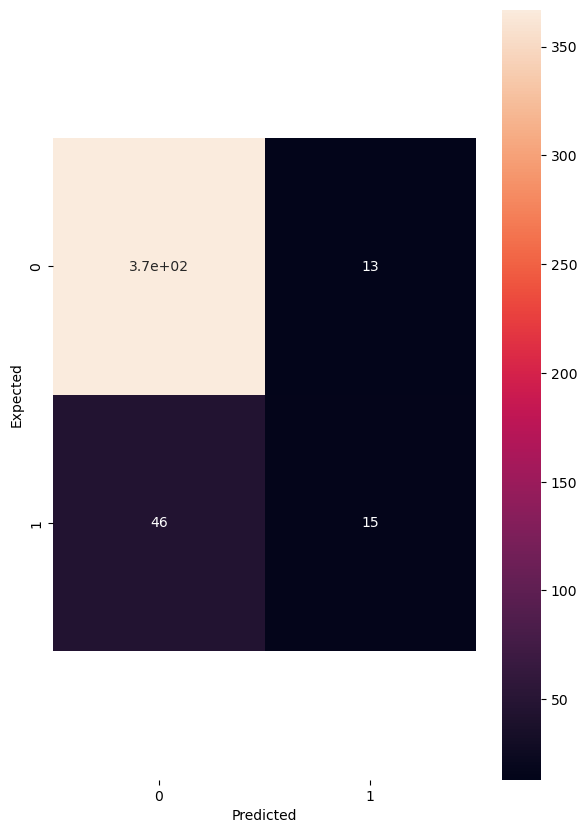

In [147]:
# Confusion Matrix
plt.figure(figsize=(15,10))

# Plot confusion matrix
ax1 = plt.subplot(1,2,1)  # Create subplot
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, ax=ax1)  # Plot confusion matrix with annotations

# Adjust heatmap
bottom, top = ax1.get_ylim()
ax1.set_ylim(bottom + 0.5, top - 0.5)

# Set labels
plt.xlabel('Predicted')
plt.ylabel('Expected')

# Show plot
plt.show()

From the above confusion matrix we can observe :
1) True Positive (TP): The model correctly predicted that 367 employees would leave the company.
2) False Positive (FP): The model incorrectly predicted that 13 employees would leave the company when they actually didn't.
3) False Negative (FN): The model incorrectly predicted that 46 employees would not leave the company when they actually did.
4) True Negative (TN): The model correctly predicted that 15 employees would not leave the company.

#### Random Forest :

In [154]:
#Importing the Random Forest Classifiers
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier()

#Fitting the model on our training data
clf.fit(X_train, Y_train)

#Predicting the target variable for the test data
y_pred = clf.predict(X_test)

#Calculating the accuracy score
accuracy_score(Y_test, y_pred)

0.8662131519274376

Our model achieved an accuracy score of approximately 0.866 on the test data. Meaning  that the model correctly predicted the target variable (in this case, employee attrition) for approximately 86.6% of the observations in the test dataset.

#### Support Vector Machine (SVM) :

In [149]:
from sklearn.svm import SVC

In [157]:
# Training the SVM model
svm_model = SVC(kernel='linear')  
svm_model.fit(X_train_scaled, Y_train)

# Making predictions on the testing data
y_pred = svm_model.predict(X_test_scaled)

# Evaluating the model
accuracy = accuracy_score(Y_test, y_pred)

print("Accuracy:", accuracy)

Accuracy: 0.8684807256235828


The accuracy of the Support Vector Machine (SVM) model with a linear kernel on the test set is approximately 86.85%. This indicates that the model correctly predicted the target variable for about 86.85% of the samples in the test set.

# Comparing All the models

In [158]:
# Compute scores
logistic_score = accuracy_score(Y_test, y_logistic_pred)
random_forest_score = accuracy_score(Y_test, y_random_forest_pred)
svc_score = accuracy_score(Y_test, y_svc_pred)

# Create a DataFrame to store the scores
scores_df = pd.DataFrame({
    'Model': ['Logistic Regression', 'Random Forest', 'SVC'],
    'Score': [logistic_score, random_forest_score, svc_score]
})

# Print the scores DataFrame
print(scores_df)

                 Model     Score
0  Logistic Regression  0.861678
1        Random Forest  0.868481
2                  SVC  0.868481


From the model results we can interpret several findings :
1) Random Forest and Support Vector Machine (SVM) models achieved the highest accuracy of approximately 86.85%.
2) Logistic Regression model achieved slightly lower accuracy at approximately 86.17%.
3) Thus, Random Forest and SVM models perform slightly better than Logistic Regression for this classification task.







# Conclusion

In conclusion, our model aimed to predict employee attrition through various machine learning models. After evaluating through the logistic regression, random forest and the support vector machine (SVM) algorithms, we observed that both the SVM and the random forest achieved almost similar accuracy. Indicating a potential effectiveness of the random forest and the SVM models in predicting employee attrition.

However, the data quality or feature selection might affect our predictive accuracy. But in order to enhance, we can do future iterations in order to refine our feature engineering techniques and also could also add relevant data sources in order to improve our predictive accuracy and help assist organization in developing more effective retention strategies.